In [1]:
from pyod.models.lof import LOF 
from src.bisect.bisect import BisectHOGen
import tensorflow as tf

#get mnist data
X_train = tf.keras.datasets.mnist.load_data()[0][0]
X_train = X_train.reshape(-1, 28*28)[:1000]


In [2]:
bisect = BisectHOGen(data=X_train, outlier_detection_method=LOF)
fake_points = bisect.fit_generate(gen_points=100, n_jobs=-1)

2023-09-07 21:53:08,664 - INFO - Fitting all subspaces....
2023-09-07 21:53:17,296 - INFO - Fitting in the full space....
2023-09-07 21:53:17,345 - INFO - Set of fitted Subspaces size: 2047


given Origin method: weighted
Calculating probability vector...
Done!
Generating 100 hidden outlier points...
n jobs:  -1


2023-09-07 21:53:24,862 - INFO - Processing point 0
2023-09-07 21:53:24,913 - INFO - x Outside of bounds
2023-09-07 21:53:24,918 - INFO - x Outside of bounds
2023-09-07 21:53:24,920 - INFO - x Outside of bounds
2023-09-07 21:53:24,923 - INFO - x Outside of bounds
2023-09-07 21:53:24,925 - INFO - x Outside of bounds
2023-09-07 21:53:24,927 - INFO - x Outside of bounds
2023-09-07 21:53:24,968 - INFO - x Outside of bounds
2023-09-07 21:53:25,008 - INFO - x Outside of bounds
2023-09-07 21:53:25,026 - INFO - x Outside of bounds
2023-09-07 21:53:25,030 - INFO - x Outside of bounds
2023-09-07 21:53:25,042 - INFO - x Outside of bounds
2023-09-07 21:53:25,044 - INFO - x Outside of bounds
2023-09-07 21:53:25,046 - INFO - x Outside of bounds
2023-09-07 21:53:25,052 - INFO - x Outside of bounds
2023-09-07 21:53:25,112 - INFO - x Outside of bounds
2023-09-07 21:53:25,128 - INFO - x Outside of bounds
2023-09-07 21:53:25,131 - INFO - x Outside of bounds
2023-09-07 21:53:25,147 - INFO - x Outside of b

Done! Exec time:  17.423654794692993


In [3]:
fake_points.shape

(100, 784)

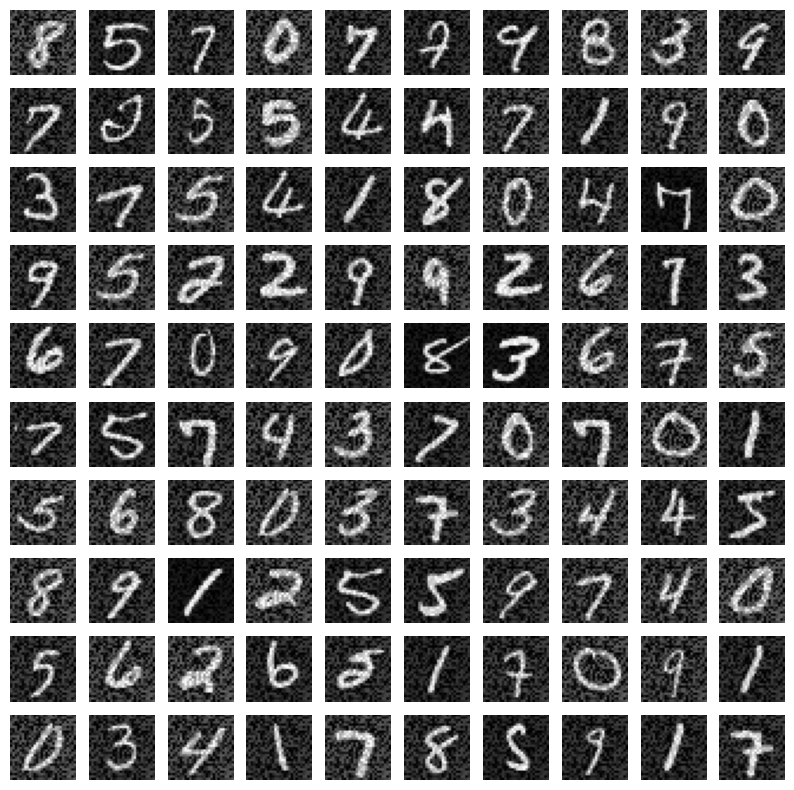

In [4]:
import matplotlib.pyplot as plt

nrows = 10
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(fake_points[i*ncols+j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')  
plt.show()

In [5]:
bisect.print_summary()

Hidden Outlier Generation Method Object

Outlier detection method used: LOF
Synthetic HO generation method employed: multi_bisection.

Database summary:

* Number of features: 784
* Total number of data points: 1000
* Total amount of synthetic data generated: 100
	...of which hidden outliers: 100
* Number of H1 outliers: 100
* Number of H2 outliers: 0.

Total execution time: 17.423654794692993.
